# Data Cleaning

### Cleaning Oppurtunities
#### fulltext
- Reduce rows based on catchphrase count for each doc, sentences word count
#### citation class
- top categories for class, top no of citations per doc, citation text length, to_case top repeation remove

### Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

## Catchphrase Extraction Data

In [2]:
summ_data = pd.read_csv('../2_Generation/extracted_data/parsed_fulltext_cases.csv')
summ_data.shape

(3890, 5)

In [3]:
import ast
# Convert stringified lists to actual lists
summ_data['catchphrases'] = summ_data['catchphrases'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

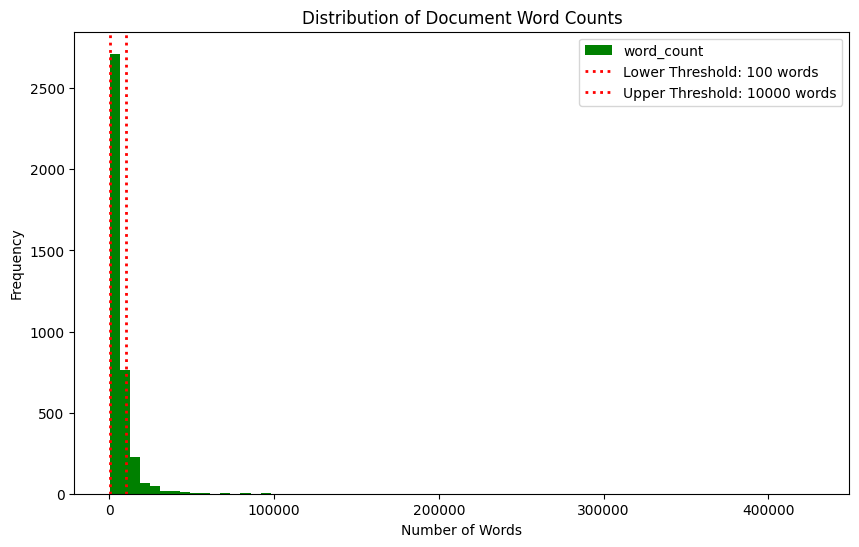

Number of documents within the range [100, 10000] words: 3284
Number of documents outside the range: 606


In [4]:
summ_data['word_count'] = summ_data['sentences'].apply(lambda x: len(x.split()))

# Set the word count thresholds
word_count_lower = 100  # Example lower threshold
word_count_upper = 10000 # Example upper threshold

# Histogram for word count distribution
plt.figure(figsize=(10, 6))
summ_data['word_count'].plot(kind='hist', bins=70, color='green')

# Add vertical red lines for the thresholds
plt.axvline(word_count_lower, color='red', linestyle='dotted', linewidth=2, label=f'Lower Threshold: {word_count_lower} words')
plt.axvline(word_count_upper, color='red', linestyle='dotted', linewidth=2, label=f'Upper Threshold: {word_count_upper} words')

# Add labels and title
plt.title('Distribution of Document Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Calculate the number of documents within and outside the range
docs_within_range = summ_data[(summ_data['word_count'] >= word_count_lower) & 
                              (summ_data['word_count'] <= word_count_upper)].shape[0]
docs_outside_range = summ_data.shape[0] - docs_within_range

# Print the results
print(f"Number of documents within the range [{word_count_lower}, {word_count_upper}] words: {docs_within_range}")
print(f"Number of documents outside the range: {docs_outside_range}")

In [5]:
# Filter rows where both conditions are met
summ_data = summ_data[
    (summ_data['word_count'] >= word_count_lower) & 
    (summ_data['word_count'] <= word_count_upper)
]

In [6]:
summ_data['num_catchphrases'] = summ_data['catchphrases'].apply(len)
summ_data.head()

,filename,name,AustLII,catchphrases,sentences,word_count,num_catchphrases
0,08_1056.xml,University of Western Australia v Gray (No 21)...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"[indemnity costs, calderbank letter, refusal o...",1 On 17 April 2008 the application brought by ...,5488,7
1,09_930.xml,Parker v Parker [2009] FCA 930 (25 August 2009),http://www.austlii.edu.au/au/cases/cth/FCA/200...,"[judicial review, application brought pursuant...",INTRODUCTION \n The applicant seeks review of ...,5046,8
2,06_1301.xml,CSL Limited v GlaxoSmithKline Australia Pty Lt...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"[interlocutory injunction, quia timet injuncti...","1 The applicant, CSL Limited (""CSL""), seeks an...",9115,7
4,08_1730.xml,Deputy Commissioner of Taxation v BK Ganter Ho...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"[winding up, neglect to pay debt after statuto...",1 This matter came on for hearing before me ye...,3993,10
5,09_1056.xml,NAOX v Minister for Immigration and Citizenshi...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,[whether the decision of the refugee review tr...,The appellants claim to be Bangladeshi homosex...,5821,12


In [7]:
summ_data['catchphrases'][0]

['indemnity costs',
 'calderbank letter',
 'refusal of offer',
 'whether refusal unreasonable',
 'variety of factors relevant to assessment of unreasonableness',
 'indemnity costs refused',
 'costs']

/Users/nithish/Documents/Academics/Fall 24/Deep Learning/LawDigestAI/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


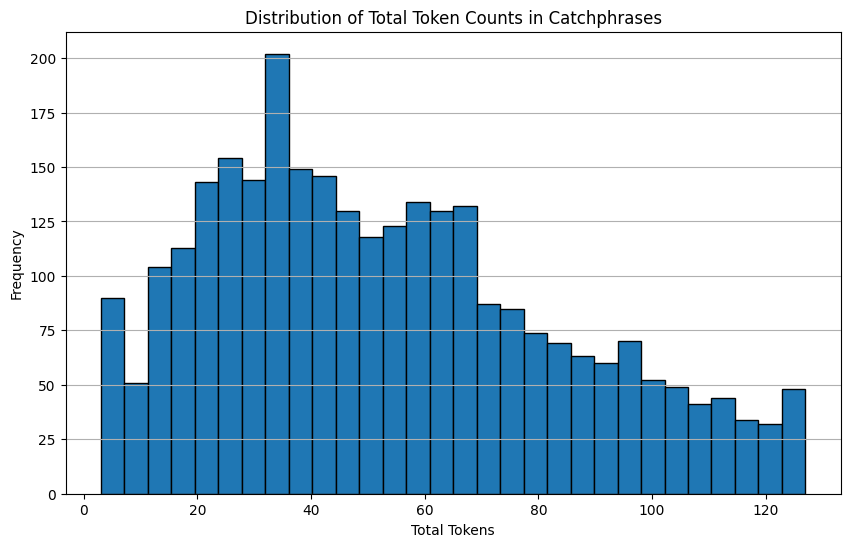

count    2871.000000
mean       53.473703
std        30.445804
min         3.000000
25%        29.000000
50%        49.000000
75%        74.000000
max       127.000000
Name: total_tokens, dtype: float64
                                        catchphrases  total_tokens
0  [indemnity costs, calderbank letter, refusal o...            29
1  [judicial review, application brought pursuant...            62
2  [interlocutory injunction, quia timet injuncti...            68
4  [winding up, neglect to pay debt after statuto...            89
6  [appeal from sequestration order of federal ma...            94


In [8]:
from transformers import T5Tokenizer
import pandas as pd
import matplotlib.pyplot as plt

# Load the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to calculate total token count for a list of catchphrases
def calculate_total_token_count(catchphrases):
    total_tokens = 0
    for phrase in catchphrases:
        # Tokenize each catchphrase and add its token count
        total_tokens += len(tokenizer.tokenize(phrase))
    return total_tokens

# Apply the function to calculate total tokens for each row
summ_data['total_tokens'] = summ_data['catchphrases'].apply(calculate_total_token_count)

summ_data = summ_data[summ_data['total_tokens'] < 128]


# Plot the distribution of total token counts
plt.figure(figsize=(10, 6))
summ_data['total_tokens'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Total Token Counts in Catchphrases")
plt.xlabel("Total Tokens")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Display basic statistics of the total tokens
print(summ_data['total_tokens'].describe())

# Preview the DataFrame with the new column
print(summ_data[['catchphrases', 'total_tokens']].head())

summ_data.to_csv("../2_Generation/filtered_data/filtered_summ_data.csv", index=False)

#### Distribution of Catchphrases per Document

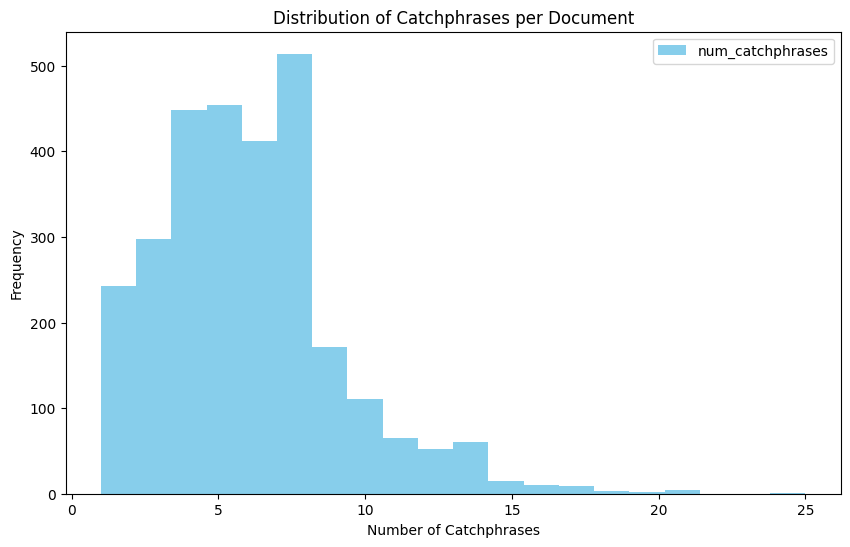

In [10]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
summ_data['num_catchphrases'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Distribution of Catchphrases per Document')
plt.xlabel('Number of Catchphrases')
plt.ylabel('Frequency')


# Adding legend
plt.legend()

# Show the plot
plt.show()

#### Distribution of Catchphrases Token

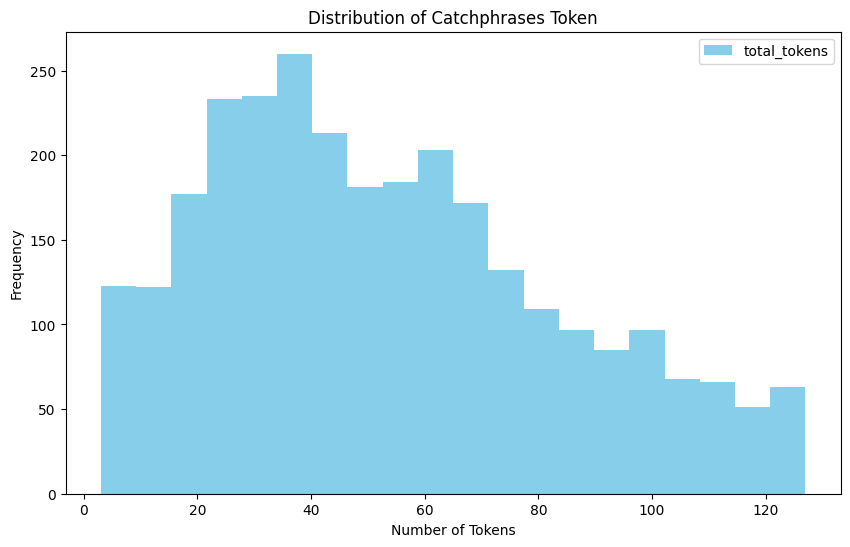

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
summ_data['total_tokens'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Distribution of Catchphrases Token')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')


# Adding legend
plt.legend()

# Show the plot
plt.show()

## Citation Classification Data

In [12]:
text_classif_data = pd.read_csv('../2_Generation/extracted_data/flattened_citation_classes.csv')

In [13]:
text_classif_data['tocase'].value_counts().head(150)

tocase
Minister for Immigration and Ethnic Affairs v Wu Shan Liang [1996] HCA 6 ; (1996) 185 CLR 259        70
General Steel Industries Inc v Commissioner for Railways (NSW) [1964] HCA 69 ; (1964) 112 CLR 125    40
Minister for Aboriginal Affairs v Peko-Wallsend Ltd [1986] HCA 40 ; (1986) 162 CLR 24                39
Kioa v West [1985] HCA 81 ; (1985) 159 CLR 550                                                       37
Australian Broadcasting Tribunal v Bond [1990] HCA 33 ; (1990) 170 CLR 321                           35
                                                                                                     ..
Butcher v Lachlan Elder Realty Pty Limited [2004] HCA 60 ; (2004) 218 CLR 592                         8
Castlemaine Tooheys Ltd v South Australia [1986] HCA 58 ; (1986) 161 CLR 148                          8
Hughes v Western Australian Cricket Association (Inc) (1986) ATPR 40-748                              8
Wati v Minister for Immigration and Multicultural Affairs

In [14]:
sum(text_classif_data['tocase'].value_counts().head(150).values.tolist())

2127

In [15]:
filtered_data = text_classif_data.copy()

In [16]:
drop_lst_tocase = text_classif_data['tocase'].value_counts().head(150).index.tolist()
text_classif_data = text_classif_data[~text_classif_data['tocase'].isin(drop_lst_tocase)]
text_classif_data

,filename,citation_id,class,tocase,AustLII,text
0,08_1056.xml,c0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,30 Ordinarily that discretion will be exercise...
1,08_1056.xml,c1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,http://www.austlii.edu.au/au/cases//cth/FCA/19...,32 The general principles governing the exerci...
2,08_1056.xml,c2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,NaN,30 Ordinarily that discretion will be exercise...
3,08_1056.xml,c3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,32 The general principles governing the exerci...
4,08_1056.xml,c4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,33 The preceding general principles inform the...
...,...,...,...,...,...,...
25251,07_163.xml,c15,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,NaN,24 That is not confined to persons who control...
25252,07_163.xml,c16,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,NaN,19 Once the threshold prescribed by s 1335 is ...
25253,07_163.xml,c17,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,NaN,19 Once the threshold prescribed by s 1335 is ...
25254,07_163.xml,c18,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",NaN,27 Given the extent to which Deumer stands to ...


class
cited            11139
referred to       4022
applied           2187
followed          2020
considered        1587
discussed          945
distinguished      602
related            113
affirmed           113
quoted             111
approved           109
notfollowed         68
reversed            26
explained           20
questioned          16
ref to              13
disapproved         11
noted                7
compared             4
referred             4
relied on            3
doubted              2
overruled            2
adopted              2
Name: count, dtype: int64


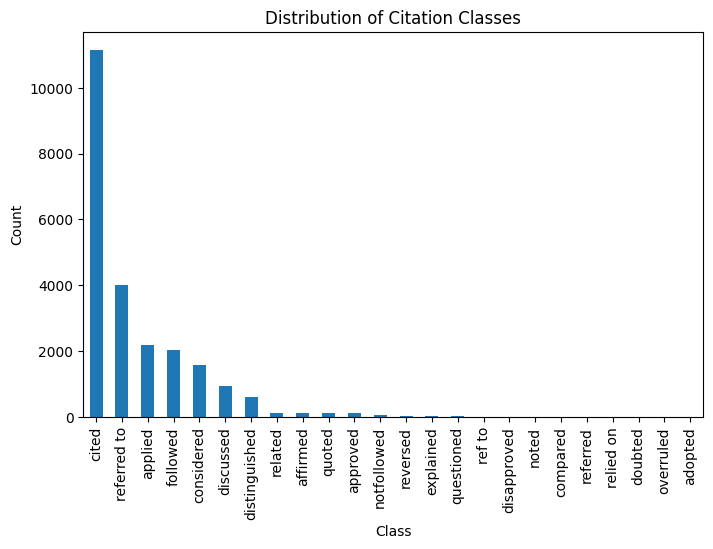

In [17]:
# Value counts of 'class' column
class_distribution = text_classif_data['class'].value_counts()

# Display the class distribution
print(class_distribution)

# Plotting the class distribution
class_distribution.plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of Citation Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [18]:
# Define the values to filter (2nd, 3rd, 4th, and 5th value counts)
filter_classes = ['cited', 'referred to', 'applied', 'followed']
text_classif_data = text_classif_data[text_classif_data['class'].isin(filter_classes)]

/var/folders/nz/x14sy1sd2rj_6ltfxbm014780000gn/T/ipykernel_86049/1386021726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_classif_data['char_count'] = text_classif_data['text'].str.len()


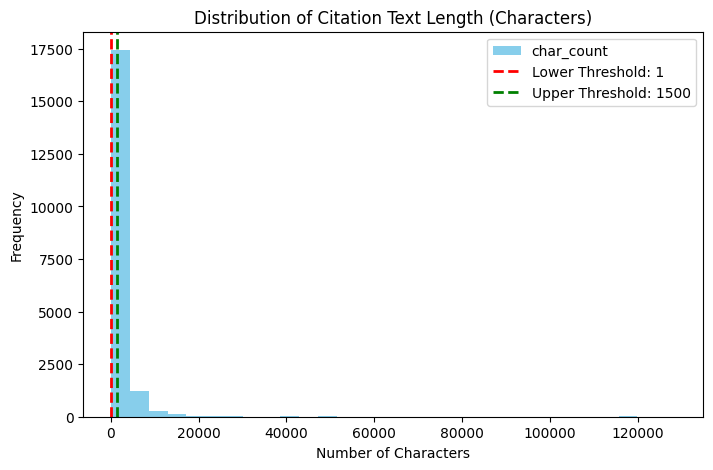

Number of records within the range [1, 1500]: 10850
Number of records outside the range: 8518


In [19]:
lower_threshold = 1
upper_threshold = 1500

text_classif_data['char_count'] = text_classif_data['text'].str.len()

plt.figure(figsize=(8, 5))
text_classif_data['char_count'].plot(kind='hist', bins=30, color='skyblue')
plt.axvline(lower_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Lower Threshold: {lower_threshold}')
plt.axvline(upper_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Upper Threshold: {upper_threshold}')
plt.title('Distribution of Citation Text Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

count_within_threshold = text_classif_data[
    (text_classif_data['char_count'] >= lower_threshold) & 
    (text_classif_data['char_count'] <= upper_threshold)
].shape[0]

count_outside_threshold = text_classif_data.shape[0] - count_within_threshold

# Print the counts
print(f"Number of records within the range [{lower_threshold}, {upper_threshold}]: {count_within_threshold}")
print(f"Number of records outside the range: {count_outside_threshold}")

# Filter rows within the threshold range
text_classif_data = text_classif_data[
    (text_classif_data['char_count'] >= lower_threshold) & 
    (text_classif_data['char_count'] <= upper_threshold)
]

In [20]:
text_classif_data['filename'].value_counts()

filename
07_963.xml     40
09_1220.xml    40
06_965.xml     39
09_1586.xml    36
08_559.xml     33
               ..
06_740.xml      1
09_56.xml       1
08_1321.xml     1
09_1428.xml     1
08_1968.xml     1
Name: count, Length: 2100, dtype: int64

In [21]:
text_classif_data['filename'].value_counts().head(100)

filename
07_963.xml     40
09_1220.xml    40
06_965.xml     39
09_1586.xml    36
08_559.xml     33
               ..
09_54.xml      15
09_650.xml     15
09_474.xml     15
08_995.xml     15
07_1216.xml    15
Name: count, Length: 100, dtype: int64

In [22]:
sum(text_classif_data['filename'].value_counts().head(100).values.tolist())

2064

In [23]:
drop_lst_filename = text_classif_data['filename'].value_counts().head(100).index.tolist()
text_classif_data = text_classif_data[~text_classif_data['filename'].isin(drop_lst_filename)]
text_classif_data

,filename,citation_id,class,tocase,AustLII,text,char_count
0,08_1056.xml,c0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,30 Ordinarily that discretion will be exercise...,431.0
1,08_1056.xml,c1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,http://www.austlii.edu.au/au/cases//cth/FCA/19...,32 The general principles governing the exerci...,994.0
2,08_1056.xml,c2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,NaN,30 Ordinarily that discretion will be exercise...,431.0
3,08_1056.xml,c3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,32 The general principles governing the exerci...,994.0
4,08_1056.xml,c4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,33 The preceding general principles inform the...,707.0
...,...,...,...,...,...,...,...
25249,07_163.xml,c13,cited,P S Chellaram &amp; Co Ltd v China Ocean Shipp...,http://www.austlii.edu.au/au/cases//cth/HCA/19...,"23 In my view, it is clear that the Court may ...",573.0
25250,07_163.xml,c14,cited,Ratepayers &amp; Residents Action Association ...,NaN,19 Once the threshold prescribed by s 1335 is ...,429.0
25251,07_163.xml,c15,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,NaN,24 That is not confined to persons who control...,929.0
25252,07_163.xml,c16,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,NaN,19 Once the threshold prescribed by s 1335 is ...,429.0


In [159]:
text_classif_data.to_csv('../2_Generation/filtered_data/filtered_txtClsf_data.csv', index= False)